In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('healthinsurance-1.csv')
df.head()

,age,sex,bmi,children,smoker,region,bloodpressure,diabetes,regular_ex,claim
0,54,female,47.4,0,0,southeast,90,1,0,63770.43
1,45,male,57.0,0,0,southeast,66,1,0,62592.87
2,52,male,34.5,3,0,northwest,70,0,0,60021.40
3,31,female,38.1,1,0,northeast,80,1,0,58571.07
4,33,female,59.0,0,0,northwest,50,1,0,55135.40


In [3]:
df.shape

(1338, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
age              1338 non-null int64
sex              1338 non-null object
bmi              1338 non-null float64
children         1338 non-null int64
smoker           1338 non-null int64
region           1338 non-null object
bloodpressure    1338 non-null int64
diabetes         1338 non-null int64
regular_ex       1338 non-null int64
claim            1338 non-null float64
dtypes: float64(2), int64(6), object(2)
memory usage: 104.6+ KB


In [5]:
df.isnull().sum()

age              0
sex              0
bmi              0
children         0
smoker           0
region           0
bloodpressure    0
diabetes         0
regular_ex       0
claim            0
dtype: int64

In [6]:
df['children'] = df['children'].astype(object)
df['diabetes'] = df['diabetes'].astype(object)
df['smoker'] = df['smoker'].astype(object)
df['regular_ex'] = df['regular_ex'].astype(object)

In [7]:
df.dtypes

age                int64
sex               object
bmi              float64
children          object
smoker            object
region            object
bloodpressure      int64
diabetes          object
regular_ex        object
claim            float64
dtype: object

In [8]:
df.describe()

,age,bmi,bloodpressure,claim
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.808281,68.977578,13270.422414
std,14.049960,6.282207,19.327770,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,64.000000,4740.287500
50%,39.000000,30.500000,72.000000,9382.030000
75%,51.000000,34.800000,80.000000,16639.915000
max,64.000000,62.000000,122.000000,63770.430000


In [9]:
df.describe(include=object)

,sex,children,smoker,region,diabetes,regular_ex
count,1338,1338,1338,1338,1338,1338
unique,2,6,2,4,2,2
top,male,0,0,southeast,1,0
freq,676,574,1145,364,920,911


In [10]:
df.groupby('diabetes')['bloodpressure'].mean()

diabetes
0    69.428230
1    68.772826
Name: bloodpressure, dtype: float64

In [11]:
df[df['bloodpressure'] == 0].groupby('smoker')['bloodpressure'].count()

smoker
0    50
1    12
Name: bloodpressure, dtype: int64

In [12]:
df[df['bloodpressure'] == 0].groupby('diabetes')['bloodpressure'].count()

diabetes
0    17
1    45
Name: bloodpressure, dtype: int64

In [13]:
df[df['bloodpressure'] == 0].groupby('regular_ex')['bloodpressure'].count()

regular_ex
0    34
1    28
Name: bloodpressure, dtype: int64

In [14]:
df[df['bloodpressure'] == 0].groupby(['smoker','diabetes','regular_ex'])['bloodpressure'].count()

smoker  diabetes  regular_ex
0       0         0              6
                  1             10
        1         0             23
                  1             11
1       0         1              1
        1         0              5
                  1              6
Name: bloodpressure, dtype: int64

In [15]:
df['bloodpressure'].value_counts(0)

70     101
74      89
68      85
64      80
72      80
78      74
80      68
76      65
0       62
60      61
62      60
66      57
82      51
90      41
84      41
88      40
86      33
58      33
50      23
56      21
54      19
52      18
92      15
75      15
65      13
85      12
48      10
94       8
110      6
96       6
98       6
100      5
44       5
108      4
104      4
55       4
30       4
46       3
106      3
40       2
95       2
61       2
102      2
122      2
38       1
114      1
24       1
Name: bloodpressure, dtype: int64

In [16]:
df.groupby('diabetes')['bloodpressure'].mean()

diabetes
0    69.428230
1    68.772826
Name: bloodpressure, dtype: float64

In [17]:
df.groupby('smoker')['bloodpressure'].mean()

smoker
0    69.057642
1    68.502591
Name: bloodpressure, dtype: float64

In [18]:
df[df['bloodpressure'] != 0].mean()

age                 39.148119
bmi                 30.874592
children             1.093260
smoker               0.141850
bloodpressure       72.329154
diabetes             0.685737
regular_ex           0.312696
claim            13250.604984
dtype: float64

In [19]:
## without taking 0 and we take mean of bloodpressure then value is 72
df['bloodpressure'] = df['bloodpressure'].replace(0, 72)

In [21]:
df[df['bloodpressure'] == 0]

,age,sex,bmi,children,smoker,region,bloodpressure,diabetes,regular_ex,claim


(array([  5.,   3.,  59., 200., 478., 362., 182.,  29.,  17.,   3.]),
 array([ 24. ,  33.8,  43.6,  53.4,  63.2,  73. ,  82.8,  92.6, 102.4,
        112.2, 122. ]),
 <a list of 10 Patch objects>)

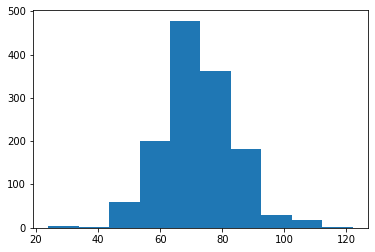

In [22]:
plt.hist(df['bloodpressure'])

In [23]:
numerical_features = df.select_dtypes(exclude=object)
categorical_features = df.select_dtypes(include=object)

In [24]:
numerical_features.corr()

,age,bmi,bloodpressure,claim
age,1.000000,0.104088,-0.006276,0.299008
bmi,0.104088,1.000000,-0.029175,0.229282
bloodpressure,-0.006276,-0.029175,1.000000,0.015407
claim,0.299008,0.229282,0.015407,1.000000


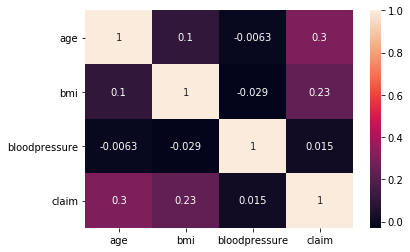

In [25]:
sns.heatmap(numerical_features.corr(),annot=True)

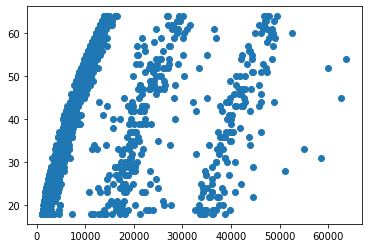

In [25]:
plt.scatter(df['claim'], df['age'])

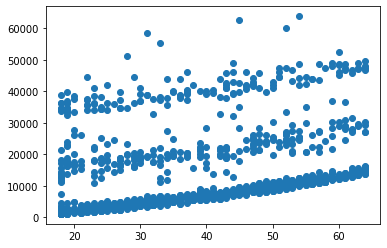

In [26]:
plt.scatter(df['age'], df['claim'])

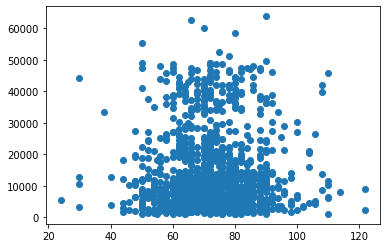

In [27]:
plt.scatter(df['bloodpressure'], df['claim'])

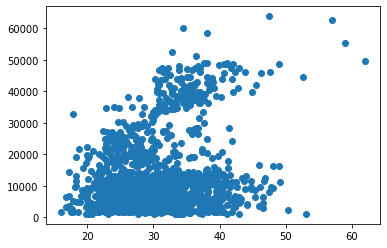

In [28]:
plt.scatter(df['bmi'], df['claim'])

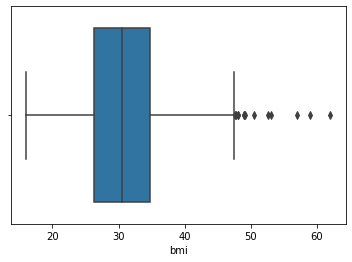

In [26]:
sns.boxplot(df['bmi'])

In [27]:
from scipy.stats import shapiro
shapiro(df['bmi'])

(0.9861054420471191, 5.207148601193978e-10)

In [28]:
numerical_features = numerical_features.drop('claim', axis = 1)
q1 = numerical_features.quantile(0.25)
q3 = numerical_features.quantile(0.75)
iqr = q3 - q1
print(iqr)

age              24.0
bmi               8.5
bloodpressure    16.0
dtype: float64


In [29]:
## to remove outliers we use square root transformation
df['bmi'] = df['bmi']**0.5
df['bloodpressure'] = df['bloodpressure']**0.5

In [30]:
shapiro(df['claim'])

(0.8146878480911255, 1.1504498962523658e-36)

In [31]:
from scipy.stats import kruskal, f_oneway

In [32]:
df.children.replace({0:'No',1:'Yes',2:'Yes',3:'Yes',4:'Yes',5:'Yes'},inplace=True)
c_yes=df[df['children']=='Yes']['claim']
c_no=df[df['children']=='No']['claim']
f_oneway(c_yes,c_no)


F_onewayResult(statistic=5.626673802460007, pvalue=0.01783017673749995)

In [33]:
kruskal(c_yes, c_no)

KruskalResult(statistic=15.338035345058689, pvalue=8.988838147348556e-05)

In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [35]:
pairwise_tukeyhsd(df['claim'], df['children'], alpha= 0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
No,Yes,1583.9655,0.0178,273.9948,2893.9361,True
